# Greedy Heuristics

Made in pairs by Andrei Kulchyk (155489) and Fiodar Piatrovich (155174).

## Description of a problem

We are given three columns of integers with a row for each node. The first two columns contain x and y coordinates of the node positions in a plane. The third column contains node costs. The goal is to select exactly 50% of the nodes (if the number of nodes is odd we round the number of nodes to be selected up) and form a Hamiltonian cycle (closed path) through this set of nodes such that the sum of the total length of the path plus the total cost of the selected nodes is minimized.

The distances between nodes are calculated as Euclidean distances rounded mathematically to
integer values. The distance matrix should be calculated just after reading an instance and then only
the distance matrix (no nodes coordinates) should be accessed by optimization methods to allow
instances defined only by distance matrices.

## Implementation

### Dependencies

In [1]:
import math
import random
import itertools as it
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [3]:
SEED: int = 369_420

random.seed(SEED)
np.random.seed(SEED)

### Read Data

In [4]:
def read_dataset_csv(csv_path: Path) -> pd.DataFrame:
    return pd.read_csv(csv_path, sep=";", names=["x", "y", "cost"])

DATA_DIR = Path("../data").resolve()

In [5]:
ds_a = read_dataset_csv(DATA_DIR / "TSPA.csv")
ds_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       200 non-null    int64
 1   y       200 non-null    int64
 2   cost    200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [6]:
ds_b = read_dataset_csv(DATA_DIR / "TSPB.csv")
ds_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       200 non-null    int64
 1   y       200 non-null    int64
 2   cost    200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


### Algorithms

In [7]:
def nodes_euclidean_distance(a: pd.Series, b: pd.Series) -> int:
    return np.int32(math.hypot(a["x"] - b["x"], a["y"] - b["y"]) + 0.5)

def nodes_cost(a: pd.Series, b: pd.Series) -> int:
    return a["cost"] + b["cost"]

def function_cost(ds: pd.DataFrame) -> int:
    cost = ds["cost"].sum()
    for i in range(-1, len(ds) - 1):
        cost += nodes_euclidean_distance(ds.iloc[i], ds.iloc[i+1])
    return int(cost)

def dm(ds: pd.DataFrame) -> np.ndarray:
    n_nodes = len(ds)
    dm = np.zeros((n_nodes, n_nodes), dtype=np.float64)
    for i, j in it.product(range(n_nodes), range(n_nodes)):
        if i == j:
            continue
        a, b = ds.iloc[i], ds.iloc[j]
        dm[i, j] = nodes_euclidean_distance(a, b) + nodes_cost(a, b)
    return dm

In [8]:
dm_a = dm(ds_a)
dm_b = dm(ds_b)

In [9]:
def plot_solution(ds: pd.DataFrame, *, title: str = "") -> None:
    if ds["x"].max() > ds["y"].max():
        width, height = 13.0, 5.0
    else:
        width, height = 5.0, 13.0

    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    sns.scatterplot(
        data=ds,
        x="x",
        y="y",
        size="cost",
        legend=False,
        ax=ax,
    ).set_title(title)

    for i in range(-1, len(ds) - 1):
        plt.plot(
            [ds.iloc[i]["x"], ds.iloc[i + 1]["x"]],
            [ds.iloc[i]["y"], ds.iloc[i + 1]["y"]],
            color="k",
            linestyle="-",
        )

    fig.show()

#### Random

In [10]:
def init_random_solution(ds: pd.DataFrame) -> pd.DataFrame:
    return ds.sample(n=int(len(ds) * 0.5 + 0.5))

In [11]:
random_solution_a = init_random_solution(ds_a)
random_solution_a

,x,y,cost
184,518,452,296
166,704,535,1567
141,1521,1224,1845
95,3691,1650,1075
171,3726,56,237
...,...,...,...
150,2540,260,1935
146,60,1148,839
77,816,696,1351
50,3846,256,1947


In [12]:
random_solution_b = init_random_solution(ds_b)
random_solution_b

,x,y,cost
32,240,1344,797
110,3208,1020,990
135,277,1305,92
113,3325,479,63
46,895,10,959
...,...,...,...
21,1820,435,299
185,3525,1112,27
171,1601,634,953
182,1595,1058,485


In [13]:
def optimize_random_solution(ds: pd.DataFrame, title: str):
    ratings = []
    for _ in range(200):
        random_solution = init_random_solution(ds)
        solution = list(random_solution.index)
        ratings.append((solution, function_cost(random_solution)))
    best = sorted(ratings, key=lambda x: x[1])[0]
    minimum = sorted(ratings, key=lambda x: x[1])[0][1]
    mean = sum([obj_function for _, obj_function in ratings]) / len(ratings)
    maximum = sorted(ratings, key=lambda x: x[1])[-1][1]

    print(best[0])
    print(f"Objective function = {best[1]}")
    print("=" * 20, end="\n\n")
    print(f"{minimum = }, {mean = }, {maximum = }")
    plot_solution(ds.loc[best[0]], title=title)

[139, 11, 131, 76, 23, 0, 113, 109, 53, 166, 146, 71, 1, 20, 132, 17, 153, 24, 137, 196, 52, 90, 91, 180, 102, 120, 25, 111, 5, 103, 192, 61, 51, 3, 70, 99, 49, 145, 27, 105, 43, 147, 4, 195, 143, 93, 22, 177, 40, 141, 88, 129, 152, 154, 18, 188, 33, 189, 197, 162, 148, 190, 151, 170, 104, 28, 156, 36, 19, 89, 142, 183, 130, 34, 184, 101, 140, 150, 56, 174, 127, 14, 95, 175, 57, 144, 198, 163, 79, 15, 169, 119, 123, 12, 117, 59, 60, 64, 32, 16]
Objective function = 240532

minimum = 240532, mean = 264280.52, maximum = 287515


/tmp/ipykernel_38075/1541435223.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


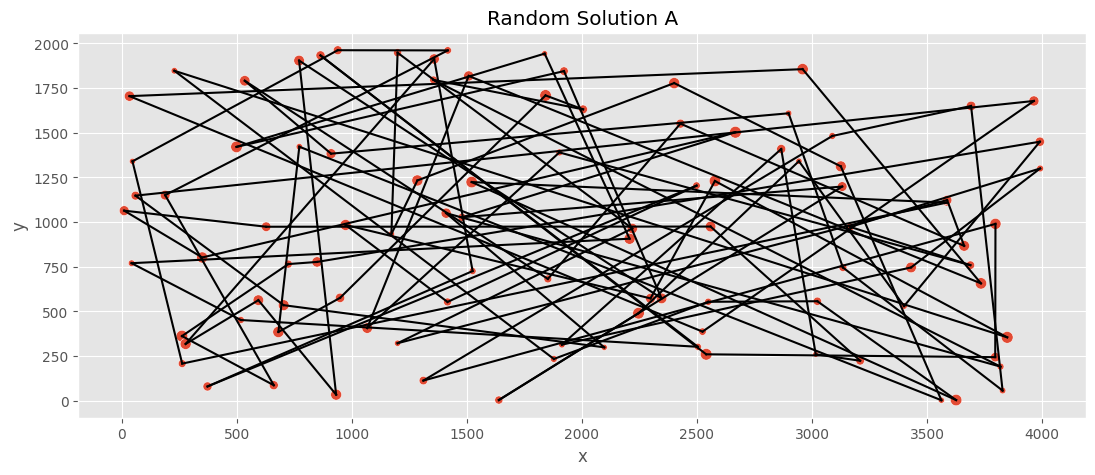

In [14]:
optimize_random_solution(ds_a, "Random Solution A")

[82, 113, 127, 76, 150, 167, 155, 48, 136, 55, 34, 53, 188, 159, 163, 71, 114, 88, 185, 83, 106, 59, 141, 78, 174, 14, 32, 20, 149, 125, 169, 172, 151, 27, 77, 6, 197, 5, 109, 44, 142, 126, 29, 162, 86, 118, 84, 130, 194, 15, 52, 134, 41, 166, 33, 99, 154, 91, 45, 65, 190, 36, 13, 183, 173, 117, 137, 124, 66, 182, 139, 98, 0, 122, 21, 196, 152, 144, 87, 119, 73, 111, 184, 61, 195, 56, 161, 198, 11, 72, 121, 187, 171, 62, 160, 31, 175, 128, 51, 7]
Objective function = 194718

minimum = 194718, mean = 214334.845, maximum = 233546


/tmp/ipykernel_38075/1541435223.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


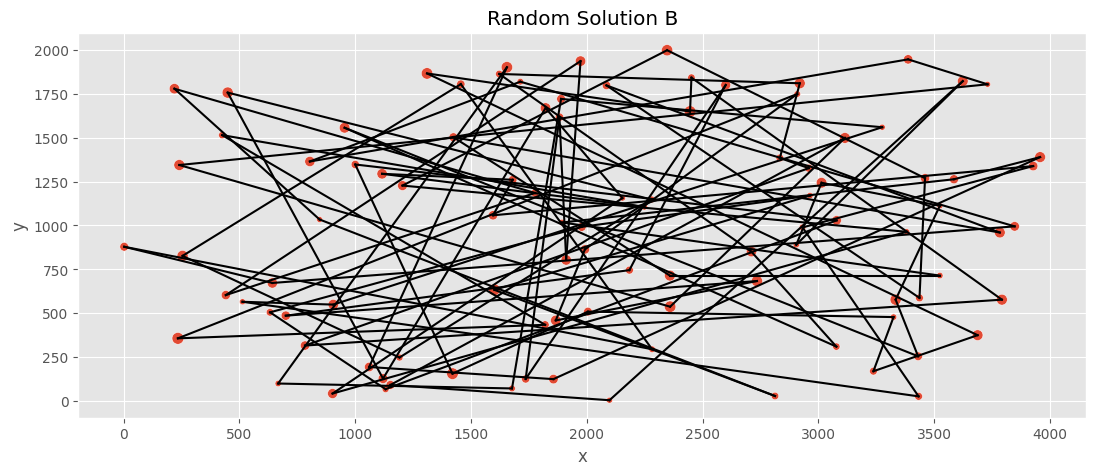

In [15]:
optimize_random_solution(ds_b, "Random Solution B")

#### Nearest neighbors 1

In [16]:
def init_nearest_neighbor_end(ds: pd.DataFrame, dm: pd.DataFrame, start: int) -> pd.Series:
    size = int(len(ds) * 0.5 + 0.5)
    num_nodes = len(ds)

    dm = dm.copy()
    
    remaining_mask = np.ones(num_nodes, dtype=bool)
    solution = [start]
    remaining_mask[start] = False

    while len(solution) < size:
        last_node = solution[-1]
        
        distances_to_last_node = dm[last_node]
        distances_to_last_node[~remaining_mask] = np.inf 
        
        nearest_node = np.argmin(distances_to_last_node)
        solution.append(nearest_node)
        remaining_mask[nearest_node] = False
    
    return ds.loc[solution]


def optimize_nearest_neighbors_end(ds: pd.DataFrame, dm: pd.DataFrame, title: str) -> None:
    ratings = []
    for i in range(200):
        end = init_nearest_neighbor_end(ds, dm, i)
        solution = list(end.index)
        ratings.append((solution, function_cost(end)))
    best = sorted(ratings, key=lambda x: x[1])[0]
    minimum = sorted(ratings, key=lambda x: x[1])[0][1]
    mean = sum([obj_function for _, obj_function in ratings]) / len(ratings)
    maximum = sorted(ratings, key=lambda x: x[1])[-1][1]

    print(best[0])
    print(f"Objective function = {best[1]}")
    print("=" * 20, end="\n\n")
    print(f"{minimum = }, {mean = }, {maximum = }")
    plot_solution(ds.loc[best[0]], title=title)

[124, 94, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 176, 80, 79, 133, 162, 51, 137, 183, 143, 0, 117, 46, 68, 93, 140, 36, 163, 199, 146, 195, 103, 5, 96, 118, 149, 131, 112, 4, 84, 35, 10, 190, 127, 70, 101, 97, 1, 152, 120, 78, 145, 185, 40, 165, 90, 81, 113, 175, 171, 16, 31, 44, 92, 57, 106, 49, 144, 62, 14, 178, 52, 55, 129, 2, 75, 86, 26, 100, 121]
Objective function = 83182

minimum = 83182, mean = 85108.51, maximum = 89433


/tmp/ipykernel_38075/1541435223.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


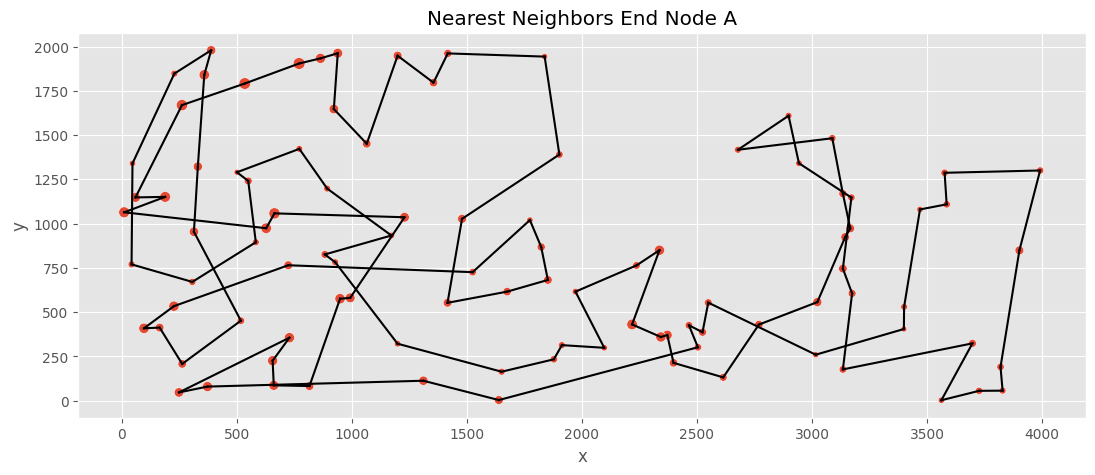

In [17]:
optimize_nearest_neighbors_end(ds_a, dm_a, "Nearest Neighbors End Node A")

[16, 1, 117, 31, 54, 193, 190, 80, 175, 5, 177, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143, 0, 29, 109, 35, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 21, 82, 144, 160, 139, 182, 25, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 51, 98, 118, 74]
Objective function = 52319

minimum = 52319, mean = 54390.43, maximum = 59030


/tmp/ipykernel_38075/1541435223.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


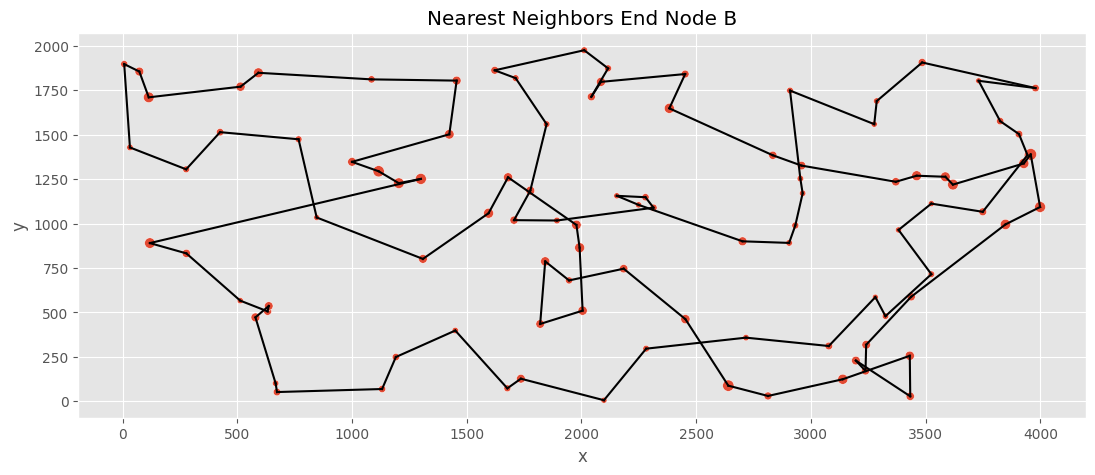

In [18]:
optimize_nearest_neighbors_end(ds_b, dm_b, "Nearest Neighbors End Node B")

#### Nearest neighbor 2

In [19]:
def init_nearest_neighbor_best_position(ds: pd.DataFrame, dm: pd.DataFrame, start: int) -> pd.Series:
    size = int(len(ds) * 0.5 + 0.5)
    num_nodes = len(ds)

    dm = dm.copy()

    solution = [start]
    remaining_nodes = set(range(num_nodes))
    remaining_nodes.remove(start)

    while len(solution) < size:
        best_insertion_cost = float("inf")
        best_insertion = None

        for node_idx in remaining_nodes:
            node_cost = ds.loc[node_idx, "cost"]
            for i in range(len(solution) + 1):
                if i == 0:
                    prev_node = solution[-1]
                else:
                    prev_node = solution[i - 1]

                if i == len(solution):
                    next_node = solution[0]
                else:
                    next_node = solution[i]

                insert_cost = (
                    dm[prev_node, node_idx] + 
                    dm[node_idx, next_node] - 
                    dm[prev_node, next_node]
                )

                total_cost = insert_cost + node_cost
                if total_cost <= best_insertion_cost:
                    best_insertion_cost = total_cost
                    best_insertion = (node_idx, i)
        
        solution.insert(best_insertion[1], best_insertion[0])
        remaining_nodes.remove(best_insertion[0])

    return ds.loc[solution]

def optimize_nearest_neighbors_best_position(ds: pd.DataFrame, dm: pd.DataFrame, title: str) -> None:
    ratings = []
    for i in range(200):
        best_position = init_nearest_neighbor_best_position(ds, dm, i)
        solution = list(best_position.index)
        ratings.append((solution, function_cost(best_position)))
    best = sorted(ratings, key=lambda x: x[1])[0]
    minimum = sorted(ratings, key=lambda x: x[1])[0][1]
    mean = sum([obj_function for _, obj_function in ratings]) / len(ratings)
    maximum = sorted(ratings, key=lambda x: x[1])[-1][1]

    print(best[0])
    print(f"Objective function = {best[1]}")
    print("=" * 20, end="\n\n")
    print(f"{minimum = }, {mean = }, {maximum = }")
    plot_solution(ds.loc[best[0]], title=title)

[7, 21, 14, 144, 62, 9, 102, 49, 178, 106, 52, 55, 57, 92, 129, 2, 152, 94, 124, 148, 15, 137, 23, 186, 89, 183, 143, 117, 0, 51, 176, 80, 79, 63, 180, 133, 151, 162, 59, 118, 115, 46, 68, 139, 41, 193, 159, 108, 18, 22, 146, 181, 34, 160, 54, 177, 10, 190, 184, 42, 43, 116, 65, 149, 35, 84, 4, 112, 123, 127, 70, 135, 154, 53, 86, 100, 26, 97, 1, 101, 75, 120, 44, 25, 16, 171, 175, 113, 31, 78, 145, 179, 196, 81, 185, 40, 165, 90, 27, 164]
Objective function = 71329

minimum = 71329, mean = 72180.12, maximum = 73282


/tmp/ipykernel_38075/1541435223.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


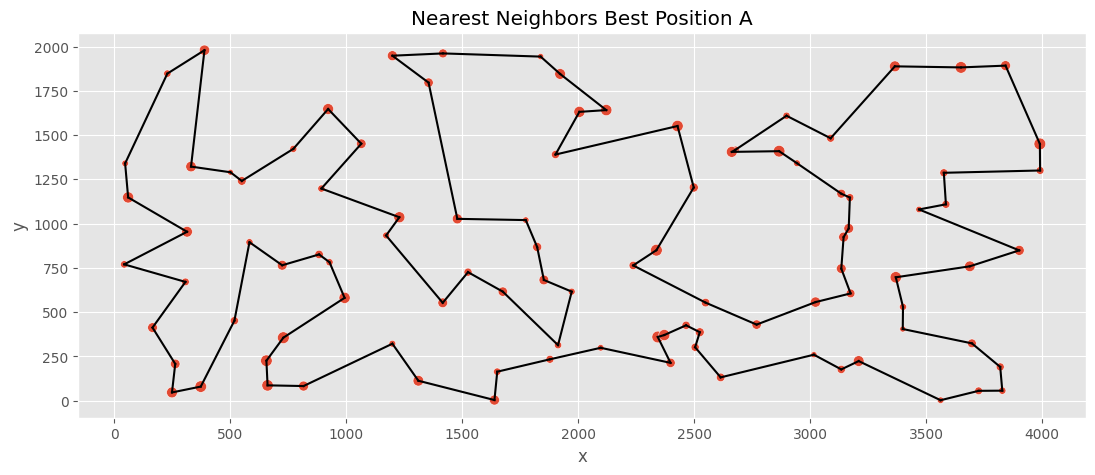

In [20]:
optimize_nearest_neighbors_best_position(ds_a, dm_a, "Nearest Neighbors Best Position A")

[4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 168, 195, 13, 132, 169, 6, 188, 70, 3, 155, 15, 145, 139, 11, 138, 33, 160, 144, 104, 8, 111, 81, 77, 82, 21, 177, 5, 25, 121, 131, 51, 147, 90, 122, 133, 107, 40, 63, 135, 38, 27, 1, 156, 198, 54, 31, 117, 193, 73, 136, 190, 80, 175, 78, 36, 61, 91, 141, 187, 153, 163, 89, 127, 137, 114, 103, 176, 113, 194, 166, 86, 95, 130, 99, 185, 179, 66, 94, 47, 148, 60, 20, 28, 149]
Objective function = 46193

minimum = 46193, mean = 47066.485, maximum = 48330


/tmp/ipykernel_38075/1541435223.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


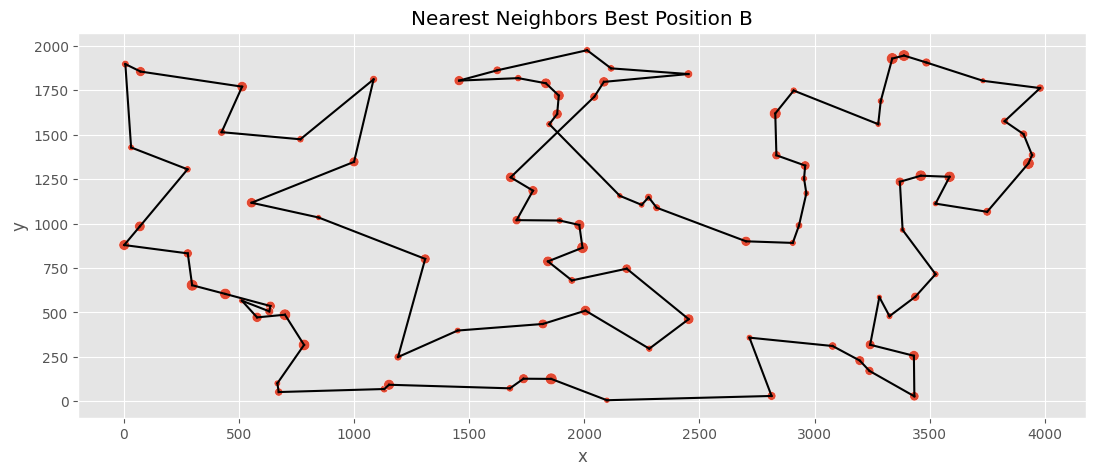

In [21]:
optimize_nearest_neighbors_best_position(ds_b, dm_b, "Nearest Neighbors Best Position B")

#### Greedy cycle

In [22]:
def init_greedy_cycle(ds: pd.DataFrame, dm: pd.DataFrame, start: int) -> pd.Series:
    size = int(len(ds) * 0.5 + 0.5)
    num_nodes = len(ds)

    dm = dm.copy()

    remaining_nodes = set(range(num_nodes))
    remaining_nodes.remove(start)
    solution = [start]

    nearest_node = np.argmin(dm[start, list(remaining_nodes)])
    nearest_node_idx = list(remaining_nodes)[nearest_node]
    solution.append(nearest_node_idx)
    remaining_nodes.remove(nearest_node_idx)

    while len(solution) < size:
        best_insertion_cost = float('inf')
        best_insertion = None

        for node_idx in remaining_nodes:
            for i in range(len(solution)):
                next_i = (i + 1) % len(solution)

                current_cost = (
                    dm[solution[i], node_idx] +
                    dm[node_idx, solution[next_i]] -
                    dm[solution[i], solution[next_i]]
                )
                
                if current_cost < best_insertion_cost:
                    best_insertion_cost = current_cost
                    best_insertion = (node_idx, i)
        
        solution.insert(best_insertion[1] + 1, best_insertion[0])
        remaining_nodes.remove(best_insertion[0])
    
    return ds.loc[solution]

def optimize_greedy_cycle(ds: pd.DataFrame, dm: pd.DataFrame, title: str) -> None:
    ratings = []
    for i in range(200):
        greedy_cycle_solution = init_greedy_cycle(ds, dm, i)
        solution = list(greedy_cycle_solution.index)
        ratings.append((solution, function_cost(greedy_cycle_solution)))
    best = sorted(ratings, key=lambda x: x[1])[0]
    minimum = sorted(ratings, key=lambda x: x[1])[0][1]
    mean = sum([obj_function for _, obj_function in ratings]) / len(ratings)
    maximum = sorted(ratings, key=lambda x: x[1])[-1][1]

    print(best[0])
    print(f"Objective function = {best[1]}")
    print("=" * 20, end="\n\n")
    print(f"{minimum = }, {mean = }, {maximum = }")
    plot_solution(ds.loc[best[0]], title=title)

[0, 117, 143, 183, 89, 186, 23, 137, 176, 80, 79, 94, 63, 152, 97, 1, 2, 129, 92, 57, 55, 52, 49, 102, 148, 9, 62, 144, 14, 178, 106, 185, 165, 21, 7, 164, 27, 90, 40, 81, 196, 179, 145, 78, 31, 113, 175, 171, 16, 25, 44, 120, 75, 101, 86, 26, 100, 53, 180, 154, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 149, 131, 65, 116, 43, 184, 35, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 181, 42, 115, 41, 193, 159, 146, 22, 18, 108, 139, 68, 46]
Objective function = 71263

minimum = 71263, mean = 72071.915, maximum = 73154


/tmp/ipykernel_38075/1541435223.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


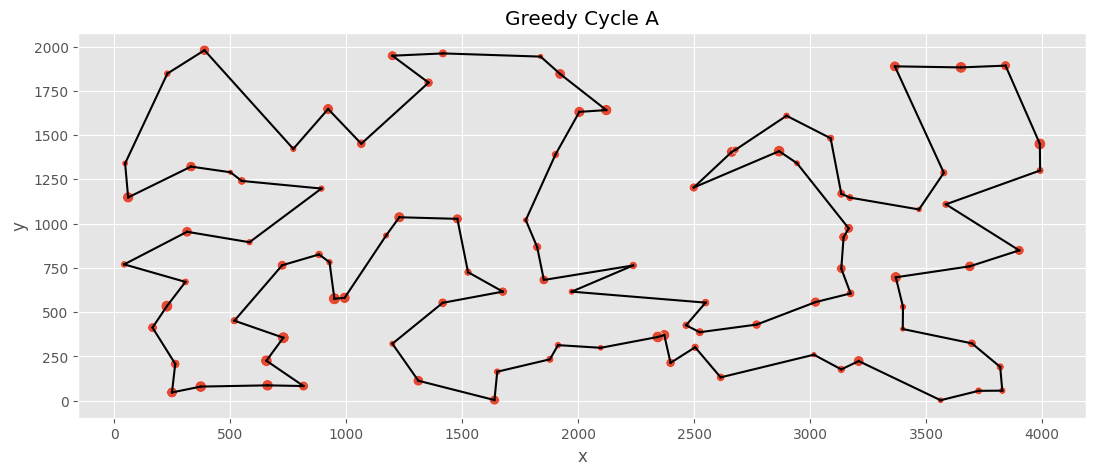

In [23]:
optimize_greedy_cycle(ds_a, dm_a, "Greedy Cycle A")

[4, 149, 28, 20, 60, 148, 47, 94, 66, 179, 185, 99, 130, 95, 86, 166, 194, 113, 176, 103, 114, 137, 127, 89, 163, 187, 153, 81, 77, 141, 91, 61, 36, 175, 78, 45, 5, 177, 21, 82, 111, 8, 104, 138, 11, 139, 182, 25, 136, 80, 190, 73, 54, 31, 193, 117, 198, 156, 1, 121, 51, 90, 131, 135, 63, 40, 107, 122, 133, 10, 147, 6, 188, 169, 132, 70, 3, 155, 15, 145, 13, 195, 168, 33, 160, 29, 0, 109, 35, 143, 106, 124, 62, 18, 55, 34, 170, 152, 183, 140]
Objective function = 45312

minimum = 45312, mean = 46903.73, maximum = 48623


/tmp/ipykernel_38075/1541435223.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


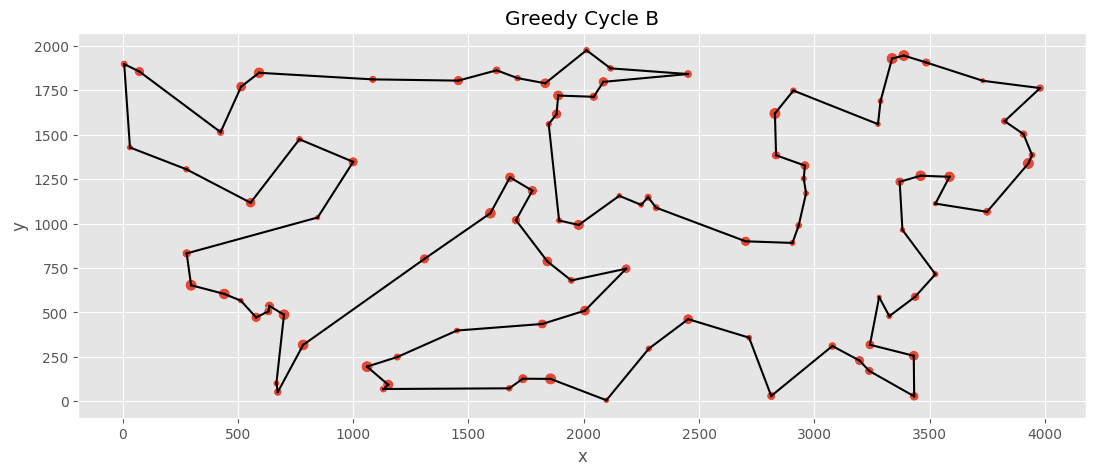

In [24]:
optimize_greedy_cycle(ds_b, dm_b, "Greedy Cycle B")

## Conclusions

Overall, on the provided problem and data sets, the greedy cycle algorithm proved to be the most efficient (objective function value 71263 for data set A and objective function value 45312 for data set B). 

Nearest neighbors with best possible position choice on the current path is the slowest ($O(k \times n^2)$ complexity where $n$ is the number of remaining nodes and $k$ is the number of visited nodes). On the contrary, greedy cycle on has $O(n^2)$ complexity and shows better performance.

Obviously, the random solution resulted in the worst solutioins.